In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
from tensorflow import keras as ks
import matplotlib.pyplot as plt

In [42]:
df_rating = pd.read_csv('ratings.csv')
df_movie = pd.read_csv('movies.csv')
df_merge =  df_rating.merge(df_movie,how='left',on='movieId')

In [43]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:

df_rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [45]:

df_merge.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance


In [46]:
df_merge.to_parquet("data/processed/df_rating_movie.parquet")

In [47]:
df_merge.groupby(["movieId", "title", "genres"]).agg({"rating": "mean", "userId": "count"}).rename(columns={"userId": "n_reviews"}).sort_values("rating", ascending=False)

,,,rating,n_reviews
movieId,title,genres,,
136782,The Girl is in Trouble (2015),Thriller,5.0,1
186119,A Gift Horse (2015),Children,5.0,1
137032,The Perfect Neighbor (2005),Drama|Thriller,5.0,1
184643,Relentless (2018),Thriller,5.0,1
137038,The Perfect Wife (2001),Drama|Thriller,5.0,1
...,...,...,...,...
5805,Besotted (2001),Drama,0.5,2
199922,Bon Bini Holland 2 (2018),Comedy,0.5,1
194608,The Black Book (2018),Drama|Romance,0.5,1


In [48]:
df_top_review = df_merge.groupby(["movieId", "title", "genres"]).agg({"rating": "mean", "userId": "count"}).rename(columns={"userId": "n_reviews"})
df_top_review = df_top_review[df_top_review.n_reviews > 10]
df_top_review.sort_values("rating", ascending=False)[:10]

,,,rating,n_reviews
movieId,title,genres,,
171011,Planet Earth II (2016),Documentary,4.483096,1124
159817,Planet Earth (2006),Documentary,4.464797,1747
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482
170705,Band of Brothers (2001),Action|Drama|War,4.398599,1356
158958,Pollyanna (2003),Children|Drama,4.384615,13
171331,The Work of Director Chris Cunningham (2003),(no genres listed),4.375000,12
169022,Classmates (2016),Animation,4.333333,12
171495,Cosmos,(no genres listed),4.326715,277
858,"Godfather, The (1972)",Crime|Drama,4.324336,52498


In [49]:
df_top_review.sort_values("n_reviews", ascending=False)[:10]

,,,rating,n_reviews
movieId,title,genres,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,81491
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,74127
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,72674
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,68717
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.679175,64144
527,Schindler's List (1993),Drama|War,4.247579,60411
110,Braveheart (1995),Action|Drama|War,4.002273,59184


In [50]:
df_top_genres = df_merge.groupby(["genres"]).agg({"rating": "mean", "userId": "count"}).rename(columns={"userId": "n_reviews"})
df_top_genres = df_top_genres[df_top_genres.n_reviews > 10]
df_top_genres.sort_values("rating", ascending=False)[:10]

,rating,n_reviews
genres,,
Action|Adventure|Mystery|Romance|Thriller,4.196617,16850
Film-Noir|Romance|Thriller,4.161201,5062
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.155508,38895
Adventure|Animation|Fantasy,4.153862,24132
Action|Adventure|Crime|Drama|Thriller,4.153175,20444
Film-Noir|Mystery,4.148480,12335
Animation|Children|Drama|Fantasy,4.148000,9375
Action|Crime|Drama|IMAX,4.147029,42189
Action|Animation|Crime|Sci-Fi,4.129717,212


In [51]:
df_top_genres.sort_values("n_reviews", ascending=False)[:10]

,rating,n_reviews
genres,,
Drama,3.692611,1765705
Comedy,3.249082,1512682
Comedy|Romance,3.373527,902051
Drama|Romance,3.668747,796335
Comedy|Drama,3.568055,721432
Comedy|Drama|Romance,3.588525,715769
Action|Adventure|Sci-Fi,3.554423,595361
Crime|Drama,3.991945,594888
Action|Crime|Thriller,3.522501,379990


In [52]:
df_train, df_val = train_test_split(df_merge, random_state=42, test_size=0.2, stratify=df_merge.rating)

In [53]:
dict_movies = {}
index = 0
for ids in sorted(df_movie.movieId):
    dict_movies[ids] = index
    index += 1

dict_users = {}
index = 0
for ids in sorted(df_rating.userId):
    dict_users[ids] = index
    index += 1

df_train["movieId"] = df_train["movieId"].map(dict_movies)
df_val["movieId"] = df_val["movieId"].map(dict_movies)

df_train["userId"] = df_train["userId"].map(dict_users)
df_val["userId"] = df_val["userId"].map(dict_users)

In [54]:
for col in ["userId", "movieId", "rating"]:
    df_train[col] = df_train[col].astype(np.float32)
    df_val[col] = df_val[col].astype(np.float32)

In [55]:
num_unique_users=len(set(list(df_train.userId.unique()) + list(df_val.userId.unique())))
num_unique_movies=len(set(list(df_train.movieId.unique()) + list(df_val.movieId.unique())))

In [83]:
EMBEDDING_SIZE = 50
users_input = ks.Input(shape=(1,), name="users_input")
users_embedding = ks.layers.Embedding(num_unique_users + 1, EMBEDDING_SIZE, name="users_embeddings")(users_input)
users_bias = ks.layers.Embedding(num_unique_users + 1, 1, name="users_bias")(users_input)

movies_input = ks.Input(shape=(1,), name="movies_input")
movies_embedding = ks.layers.Embedding(num_unique_movies + 1, EMBEDDING_SIZE, name="movies_embedding")(movies_input)
movies_bias = ks.layers.Embedding(num_unique_movies + 1, 1, name="movies_bias")(movies_input)

dot_product_users_movies = ks.layers.multiply([users_embedding, movies_embedding])
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = ks.layers.Flatten(name="fl_inputs")(input_terms)
output = ks.layers.Dense(1, activation="relu", name="output")(input_terms)
model = ks.Model(inputs=[users_input, movies_input], outputs=output)

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 20)        3250840     ['users_input[0][0]']            
                                                                                                  
 movies_embedding (Embedding)   (None, 1, 20)        1180960     ['movies_input[0][0]']           
                                                                                            

In [76]:
opt_adam = ks.optimizers.Adam(learning_rate = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

In [78]:
model.fit(x=[df_train.userId, df_train.movieId], y=df_train.rating, batch_size=512, epochs=3, verbose=1, validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'model_1/users_embeddings/embedding_lookup' defined at (most recent call last):
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "b:\dev\iaAlgo\venv\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "b:\dev\iaAlgo\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\MrBen\AppData\Local\Temp\ipykernel_20260\3514250599.py", line 1, in <module>
      model.fit(x=[df_train.userId, df_train.movieId], y=df_train.rating, batch_size=512, epochs=3, verbose=1, validation_data=([df_val.userId, df_val.movieId], df_val.rating))
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_1/users_embeddings/embedding_lookup'
indices[0,0] = 4219945 is not in [0, 162542)
	 [[{{node model_1/users_embeddings/embedding_lookup}}]] [Op:__inference_train_function_2956]

In [79]:
min_rating=min(df_train.rating.min(), df_val.rating.min())
max_rating=max(df_train.rating.max(), df_val.rating.max())

In [81]:
output = ks.layers.Dense(1, activation="sigmoid", name="output")(input_terms) 
output = output * (max_rating - min_rating) + min_rating

In [84]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 50)        8127100     ['users_input[0][0]']            
                                                                                                  
 movies_embedding (Embedding)   (None, 1, 50)        2952400     ['movies_input[0][0]']           
                                                                                            

In [86]:
opt_adam =  ks.optimizers.Adam(learning_rate = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])


In [87]:
model.fit(x=[df_train.userId, df_train.movieId], y=df_train.rating, batch_size=2048, epochs=3, verbose=1, validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'model_2/movies_bias/embedding_lookup' defined at (most recent call last):
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "b:\dev\iaAlgo\venv\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "b:\dev\iaAlgo\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\MrBen\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "b:\dev\iaAlgo\venv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "b:\dev\iaAlgo\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\MrBen\AppData\Local\Temp\ipykernel_20260\1718220704.py", line 1, in <module>
      model.fit(x=[df_train.userId, df_train.movieId], y=df_train.rating, batch_size=2048, epochs=3, verbose=1, validation_data=([df_val.userId, df_val.movieId], df_val.rating))
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "b:\dev\iaAlgo\venv\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_2/movies_bias/embedding_lookup'
indices[1456,0] = 59844 is not in [0, 59048)
	 [[{{node model_2/movies_bias/embedding_lookup}}]] [Op:__inference_train_function_5502]

In [126]:
dict_weights = {}
for layer in model.layers:
    if layer.name in ["users_embeddings", "movies_embedding", "users_bias", "movies_bias"]:
        dict_weights[layer.name] = layer.weights
    print(layer.name)

users_input
movies_input
users_embeddings
movies_embedding
multiply_4
users_bias
tf.__operators__.add_9
movies_bias
tf.__operators__.add_10
fl_inputs
output


In [129]:
df_movies_embeddings = pd.DataFrame(dict_weights["movies_embedding"][0].numpy())
df_movies_embeddings.columns = ["emb_" + str(col) for col in df_movies_embeddings.columns]
df_movies_embeddings.reset_index(inplace=True)
df_movies_embeddings.rename(columns={"index":"movieId"}, inplace=True)

In [130]:
df_movies_embeddings = df_movies_embeddings.merge(df_train[["movieId", "title", "genres"]].drop_duplicates(), how="left", on="movieId")

In [131]:
vec_tsne = TSNE(n_components=2).fit_transform(df_movies_embeddings[[col for col in df_movies_embeddings.columns if "emb" in col]])
df_movies_embeddings["tsne_0"] = vec_tsne[:, 0]
df_movies_embeddings["tsne_1"] = vec_tsne[:, 1]

b:\dev\iaAlgo\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
b:\dev\iaAlgo\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


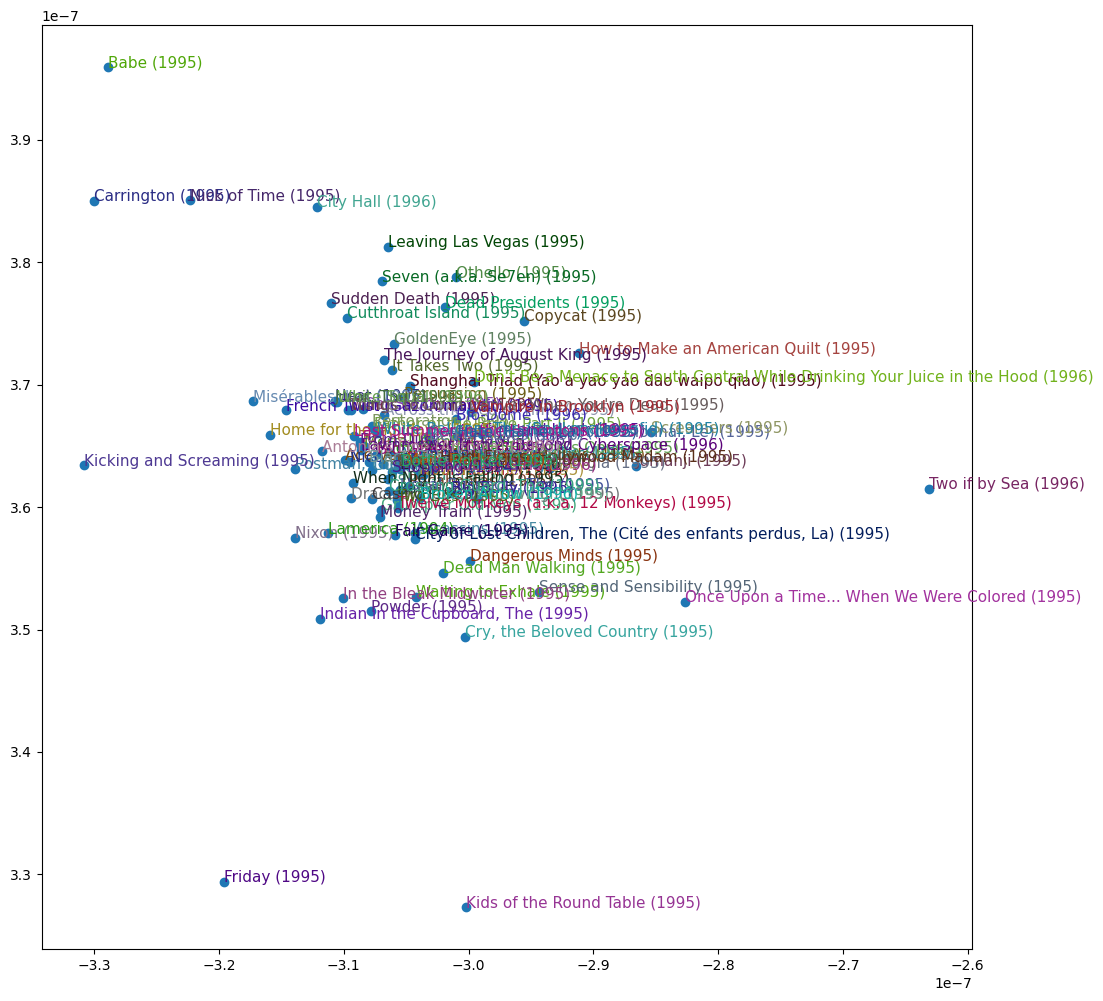

In [132]:
plt.figure(figsize=(12,12))
plt.scatter(df_movies_embeddings.tsne_0[:100], df_movies_embeddings.tsne_1[:100])
for i, x, y in zip(df_movies_embeddings.title[:100], df_movies_embeddings.tsne_0[:100], df_movies_embeddings.tsne_1[:100]):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)

In [142]:
km = KMeans(100, random_state=101)
km.fit(df_movies_embeddings[[col for col in df_movies_embeddings.columns if "emb" in col]])
clusters = km.predict(df_movies_embeddings[[col for col in df_movies_embeddings.columns if "emb" in col]])
df_movies_embeddings["cluster_n10"] = clusters

In [144]:
df_movies_embeddings[df_movies_embeddings.cluster_n10==56][["title","genres"]]

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
143,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller
150,"Addiction, The (1995)",Drama|Horror
234,Forget Paris (1995),Comedy|Romance
280,New Jersey Drive (1995),Crime|Drama
...,...,...
58790,Travelling Light (2003),(no genres listed)
58806,Against The Night (2017),Horror|Mystery|Thriller
58911,The Making of 'The Young Ones' (2007),Documentary
58930,NaN,NaN


In [137]:
df_movies_embeddings[df_movies_embeddings.cluster_n10==81][["title","genres"]]

,title,genres
138,Up Close and Personal (1996),Drama|Romance
211,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
230,Exotica (1994),Drama
257,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
378,Wyatt Earp (1994),Western
...,...,...
58290,Robin Hood: The Rebellion (2018),Action|Adventure
58310,"Crosby, Columbo, and Vallee (1932)",Animation|Comedy
58390,Untogether (2019),Comedy|Drama
58628,The Devil We Know (2018),Documentary


In [138]:
df_movies_embeddings[df_movies_embeddings.cluster_n10==84][["title","genres"]]

,title,genres
55,Kids of the Round Table (1995),Adventure|Children|Comedy|Fantasy
126,Jupiter's Wife (1994),Documentary
134,From the Journals of Jean Seberg (1995),Documentary
175,Lord of Illusions (1995),Horror
375,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
...,...,...
58338,Buddy the Woodsman (1934),(no genres listed)
58417,Gypsy Princess (1971),Comedy|Drama
58529,7-Man Army (1976),War
58567,The Devil's Game (2008),Drama|Thriller


In [139]:
df_movies_embeddings["bias"] = dict_weights["movies_bias"][0].numpy()

In [141]:
df_movies_embeddings[["title","bias"]].sort_values("bias",ascending=False)[:10]

,title,bias
6104,Nowhere in Africa (Nirgendwo in Afrika) (2001),0.050000
55848,Meteors (2017),0.049998
18706,Budd Boetticher: A Man Can Do That (2005),0.049994
58506,Co-ed Call Girl (1996),0.049989
13781,Chronicle of an Escape (Crónica de una fuga) (...,0.049988
1650,"Other Voices, Other Rooms (1995)",0.049987
54659,Hannah Gadsby: Nanette (2018),0.049986
55656,Hubert Selby Jr: It'll Be Better Tomorrow (2006),0.049983
41617,Johan Falk: Barninfiltratören (2012),0.049981
22966,Decoder (1984),0.049978
